<h3 align=center>Data Modeling and Fitting with Imported Data</h3>
<h3 align=center>(Multivariate Linear Regression)</h3>
<h2 align=center>Ben Bland</h2>

<h2>Data and Problem Description</h2>
The data that we will explore involves diabetes patients, each patient has 10 variables. There were 442 patients (samples in the dataset) who reported back one year after the data was taken to observe how the disease progressed from the baseline levels.

| Data Set Characteristics              |
| ------------- |:-------------:| -----:|
| Number of instances:| 442 |
| Number of attributes:|First 10 columns are numeric predictive values |
| Target: |Column 11 is a quantitative measure of disease progression one year after baseline |
|Attributes: |Age|
| |Sex|
| |Body Mass Index|
| |Average Blood Pressure|
| |S1|
| |S2|
| |S3|
| |S4|
| |S5|
| |S6|

<b>Note:</b><i> Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).</i>
Source URL: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

<h2 align=center style="color:red">Comments on Diabetes Dataset</h2>

While it is possible to import the diabetes dataset directly from the web, this version of the dataset is lacking normalization within the feature matrix and will cause many errors when trying to analyze the data.

In [2]:
import pandas as pd
df=pd.read_csv("http://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", encoding="utf-8", comment='#', sep='\s+')
df.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


Before we start building our model, we need to <i>normalize</i> the dataset. If we do not normalize the dataset before beginning, analysis will become impossible due to errors. <i>Normalization</i> of the feature matrix is performed by adjusting the values of all features so that they have similar magnitudes. There are two popular methods of formatting the dataset in order to work with our analysis tools: scaling and normalization. 

While most real datasets will be messy and need to be formatted and cleaned, we will import a version of the diabetes dataset that is already been normalized.

In [3]:
%matplotlib inline
import numpy as np

<h2>Part 1: Model building in scikit-learn</h2>

In [4]:
#Load the normalized diabetes dataset
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

#The diabetes dataset is stored as a Python dictionary (key:value pairs) with two keys 'target' and 'data'
#The value of the 'target' key is a 442 x 1 array and the value of the 'data' key is a 442 x 10 array.

#Store the feature matrix (X) and response vector (y)
X=diabetes.data
y=diabetes.target
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


<b>"Features"</b> are also known as predictors, inputs, or attributes. The <b>"response"</b> is also known as the target, label, or output.

In [5]:
#Check the shapes of X and y (don't forget, y is lowercase because it is a column vector)
#Look at the shape below

print(X.shape)
print(y.shape)

(442, 10)
(442,)


<h2><u> More Pandas to Handle Our Data</u></h2>

<b>"Observations"</b> are also known as samples, instances, or records.

In [6]:
#Examine the first 5 rows of the feature matrix
#Note: we are creating and including the feature names here

import pandas as pd
pd.DataFrame(X, columns=['Age','Sex','BMI','BP','S1','S2','S3','S4','S5','S6']).tail()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [7]:
#Examine the response vector
print(y)

[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  268.  274.  158.
  107.   83.  103.  272.   85.  280.  336.  281.  118.  317.  235.   60.
  174.  259.  178.  128.   96.  126.  288.   88.  292.   71.  197.  186.
   25.   84.   96.  195.   53.  217.  172.  131.  2

In order to <b>build a model</b>, the features must be <b>numeric</b>, and every observation must have the <b>same features in the same order</b>. Let's build a model using only two features from the data; <b>Age</b> & <b>Sex</b>.

In [8]:
#Use only two features (Age and Sex)
features = (0,1)
X = X[:, features]

#We first need to train the machine learning algorithm
#So we split X and y into X_train, X_test, y_train, y_test
#using the scikit-learn function train_test_split()

Scikit-learn has a function that randomly shuffles the data and splits it into training and test data. The function is called <b>train_test_split</b> and by default (<i>unless you override the hyperparameters</i>) will split the data with <b>75% of the rows being used for training, and 25% for testing</b>.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#Examine the training and test data
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_train.shape: (331, 2)
y_train.shape: (331,)
X_test.shape: (111, 2)
y_test.shape: (111,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD9882C550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DD98D7D978>]], dtype=object)

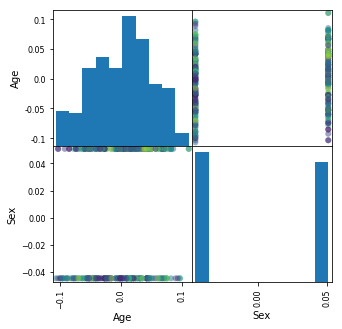

In [11]:
#Create a Pandas dataframe so that we can plot our data...
diabetes_dataframe = pd.DataFrame(X_train, columns=['Age','Sex'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})

<h2><u>Creating a Predictive Model</u></h2>

<h3 style=color:green>Let's build the model by instantiating the LinearRegression() method and calling the model's fit function.</h3>

In [12]:
#Instantiate the model with default parameters (i.e. create an instance of the model)
#This is ordinary least squares regression OLS
regr = linear_model.LinearRegression()

#Training the model (i.e. fitting the model with training data)
regr.fit(X_train,y_train)

#Printing the coefficients
print(regr.coef_)

[ 303.32122399   30.5495671 ]


<h2><u>Model Evaluation: Making Predictions and Scoring the Model</u></h2>

<h3>Part 2: Using our Model to Make Predictions</h3>

Now that the model has been trained, we can now use the model to make predictions on <b>new data</b> for which we might not know the correct outcomes (i.e. the y-values). In order to <b>make a prediction</b>, the new observation must have the <b>same features as the training observations</b>, both in number and in meaning.

In [13]:
#Predicting y-value based on the training data. We input a normalized list of Age and Sex Data [Age,Sex]

X_new=np.array([0.041708, 0.050680])
#Reshape the array so that NumPy can use it
X_new=np.reshape(X_new, (1,-1))
print('X_new shape: {}'.format(X_new.shape))

X_new shape: (1, 2)


To make a prediction, we call the predict method of the regr object:

In [14]:
prediction = regr.predict(X_new)
print('Prediction is: {}'.format(prediction))
print(regr.score(X_test,y_test))

Prediction is: [ 166.08720662]
0.0345926007691


<h2><u>Creating 3D Plots with MatPlotLib</u></h2>

<h3>Part 3: Plotting Our Model in 3D</h3>

<h3 style="color:green">Plot the training data and testing data on the fitted surface</h3>

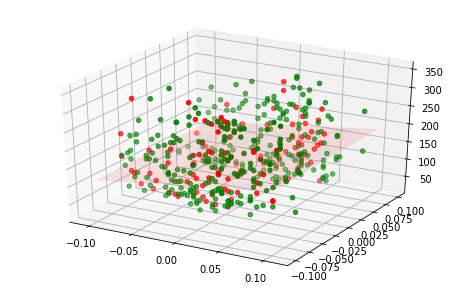

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Define an inline function (using Lambda) with coefficient variables
#returned from the regression analysis.

coef=regr.coef_
intercept=regr.intercept_
line=lambda x1, x2: coef[0]*x1 + coef[1]*x2 + intercept

#Plotting
fig=plt.figure(figsize=(8,5))
grid_x1, grid_x2 = np.mgrid[-.1:.1:10j, -.1:.1:10j]

#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='green')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='red')
ax.plot_surface(grid_x1, grid_x2, line(grid_x1,grid_x2), alpha=0.1, color='red')

#Saving the plot as a .pdf file
fig.savefig('Diabetesplot_Lab3.pdf', bbox='tight')

<h2>Discussion and Comments</h2>

In the plot above, it appears to be that a large majority of the points are not on the plane. Earlier in the lab, in the prediction section, the model predicted a y-value with an accuracy of barely 3.5%. It could be said that this model in it's current stage is of no value and should not be used in real applications. However, the model could be improved by obtaining more diabetic data and feeding it into the model. What is also tricky is the numeric values that are used in the feature array. In the dataframe scatter matrix, how are we supposed to know what numeric values correspond to male or female? I'm interested if there are any tricks to converting these values back to their original values once the analysis is done, in order to make it easier to present the analysis in layman's terms.

I feel that in it's current format, this plot is hard to interpret due to not only the clustering of the data points but the orientation of the red plane within the 3D space. I will ask you for help with clarification tomorrow in class. I am assuming that the fainter the color, the more towards the 'back' of the 3D space the data point is (and the more vibrant the color, the more towards the 'front').

I have created two additional Jupyter noteboook files where I have made modifications to this model. The results on these modifications can be seen below. The code is only present in the separate files.

<h3> Model Modification 1: Different Features</h3>

In Mod 1, the features were changed from 'Age' and 'Sex' to 'Body Mass Index' and 'Blood Pressure'. I believed that since these values related more directly to a person's overall health than their age or sex, they would be better indicators for people who are at-risk to diabetes. The model accuracy went from 3.5% to about 25% from this change alone. When plotted, the data points were clustered closer together than they were in the original model.

<h3>Model Modification 2: Three Features</h3>

In Mod 2, a third feature was added ('Age'). Ultimately, this did not improve the model's accuracy, it actually worsened it. The accuracy score in Mod 1 was 0.24616, while the score in Mod 2 was 0.24557. A slight decrease, but still noteworthy.